This dataset contains information about various car models and their CO2 Emission levels. The following code demonstrates usage of a simple Linear Regression model using the method of Ordinary Least Squares, to predict CO2 Emission values. The data is divided into train and test sets to measure the metrics of performance of the model. Toward the end of the code, there are also some other Regression techniques.

The first section represents the **'Plan'** and **"Analyze'** stages of a project, starting from importing packages to checking the distribution of counts for different categories.

The next section represents the **'Construct'** and **'Execute'** stages of the project, which demonstrates statistical modelling and interpreting the results.

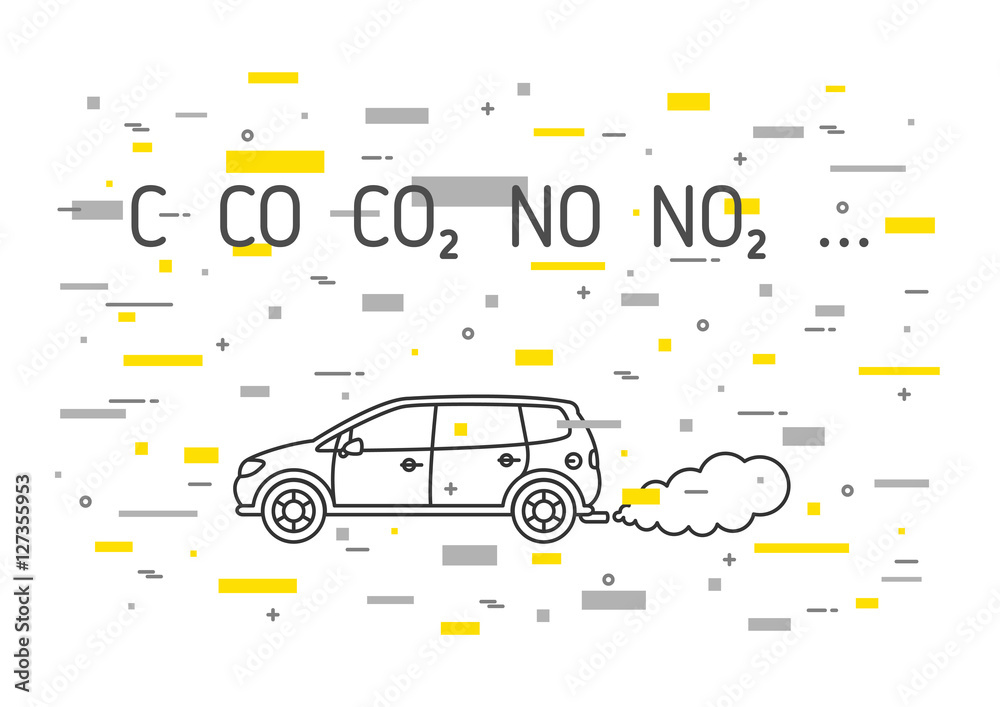

***
## 1. Exploratory Data Analysis
***

We start with importing the necessary packages. 

* **pandas**- for working with dataframes.

* **numpy**- for working with arrays and functions.

* **seaborn** and **matplotlib**- for plotting graphs.

In [ ]:
#Importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 0.8, color_codes=True)
import matplotlib.pyplot as plt 
import sklearn.metrics as mt 
import statsmodels.api as sm 

We save the dataset into the dataframe 'co2_data', and make a copy of it into the 'data' dataframe to work with it. This preserves the integrity of the original data if required somewhere in the notebook.

In [ ]:
#Saving the dataset into a dataframe

co2_data=pd.read_csv('/kaggle/input/co2-emissions/CO2 Emissions.csv') 
data=co2_data.copy() 

In [ ]:
#Number of Rows and Columns 

data.shape

Thus, there appears to be **7,385 rows and 12 columns** in this dataset.

Looking at the first few entries would give us an idea bout the structure of the dataset and the column types. 

In [ ]:
#First 20 rows of the dataset

data.head(20)

Exploring further the data types of each column, we get an idea of the independent and dependent variables. Also, we can check if there are null values in the dataset.

In [ ]:
#Data types of each column 

data.info() 

We see that there are no discrpancies in data types of each column; the string ones are assigned as object and the numeric ones are assigned as float or int.

The 'Make', 'Model', 'Vehicle Class', 'Transmission' and 'Fuel Type' columns contain object values, and the 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)' and 'CO2 Emissions(g/km)' columns contain numeric values. 

We check for missing values again, for each column.

In [ ]:
print(pd.isnull(data).sum())

The dataset seems to be free of any null values.


We now check for outliers in the numeric columns.

In [ ]:
#Preliminary statistics for numerical columns.

data.describe() 

To get a clearer idea of the presence of outliers for each column, we use a function.

In [ ]:
# Function to calculate percentage of values for each column that lies outside the interquartile range

def percent_outliers(data):
    outl=0
    i =0
    q1, q3 = np.percentile(data,[25, 75])
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for i in range (data.size):
        if data[i]>ul or  data[i]<ll:
            outl=outl+1
    return outl*100/(data.size)
        

Plotting figures for numeric columns to visualize the presence of outliers.

In [ ]:
#Plotting for Counts vs Engine Size(L)

plt.figure(figsize=(5,3))
sns.histplot(data['Engine Size(L)'])

print("Percentage outliers for Engine Size(L):", percent_outliers(data['Engine Size(L)']),"%")

From graph, it is evident that most cars have an engine size of 2 l. Sizes between 3-4 l are common as well.

In [ ]:
#COunt vs Number of Cylinders

plt.figure(figsize=(5,3))
sns.histplot(data['Cylinders'])

print("Percentage outliers for Cylinders:", percent_outliers(data['Cylinders']),"%")

Most cars have 4 cylinders, followed by 6. The outliers are must be the values 2, 10 and 12. However, these values are not physically absurd so they don't need to be removed; there exists cars having 12 cylinders (namely the V12 engine), as well as old models that have 2 cylinders.

In [ ]:
#Count vs Fuel Consumption range

plt.figure(figsize=(5,3))
sns.histplot(data['Fuel Consumption Comb (mpg)'])

print("Percentage outliers for Fuel Consumption Comb (mpg):", percent_outliers(data['Fuel Consumption Comb (mpg)']),"%")

The combined fuel consumption resembles a Normal distribution, which means that the fuel comsumption for city and highway and combined in l/100km must also resemble the same.

In [ ]:
#Visualizing the distribution of the inverse conversion factor from mpg to l/100km

data1=pd.DataFrame()
data1['conversion factor']= data['Fuel Consumption Comb (mpg)']/data['Fuel Consumption Comb (L/100 km)']

sns.histplot(x=data1['conversion factor'])

The units mpg and l/100km are dimensionally inverse of each other.

Checking the unique values for the categorical variables and their counts.

In [ ]:
#Count vs Make 

plt.figure(figsize=(7,10))
sns.histplot(y=data['Make'])

In [ ]:
#Count vs Vehicle Class

plt.figure(figsize=(4,6))
sns.histplot(y=data['Vehicle Class'])

Most of the cars are small SUVs, followed by mid- sized cars.

In [ ]:
#Count vs Transmission

plt.figure(figsize=(3,6))
sns.histplot(y=data['Transmission'])

AS6 transmission type is the most common, followed by M6.

In [ ]:
#Count vs Fuel Type

plt.figure(figsize=(2,3))
sns.histplot(y=data['Fuel Type'])

X is the most common Fuel Type, followed by Z.

***
## 2. Statistical Analysis 
***

We now look at the correlation of the target variable (CO2 Emission) with various numerical columns.

In [ ]:
#Correlation table and heat map to determine the coefficients.

corre=data.corr()

print(corre)

plt.figure(figsize=(5,5))
sns.heatmap(corre)

We see that the numerical variables are strongly correlated with CO2 Emissions. Apart from the Combined Fuel Consumption in mpg, we see that all other variables are positively correlated with the target variable. 

In [ ]:
#Regression line of CO2 Emissions vs Engine Size (L)

sns.regplot(x=data['Engine Size(L)'], y = data['CO2 Emissions(g/km)'])

The residues seem to be normally distributed about the regression line. 

In [ ]:
#Regression line of CO2 Emissions vs Number of Cylinders

sns.regplot(x=data['Cylinders'], y = data['CO2 Emissions(g/km)'], color='black' )                                          

In [ ]:
#Regression line of CO2 Emissions vs Combined Fuel Consumption in l/100 km 

plt.figure(figsize=(25,20))
sns.regplot(x=data['Fuel Consumption Comb (L/100 km)'], y = data['CO2 Emissions(g/km)'], color='red')

Engine Size,  number of Cylinders, and the Combined Fuel Consumption, all seem to be linearly correlated with CO2 Emission. In the last graph of CO2 Emission vs Combined Fuel Consumption, there seems to be multiple lines, around 5, of varying density of points near it. Remember, 'Fuel Type' has 5 distinct categories. This implies a possible relationship between Combined Fuel Consumption and Fuel Type, and thus with CO2 Emisssion.

We now divide the dataset into train and test sets, using the scikit-learn module. FIrst, we make a list of independent variables and create a dataframe that takes the independent variables and their corresponding values, as 'x'. The target variable, i.e. predicting the CO2 Emissions, is stored as 'y'. Next, we use the train_test_split function to split the data as 75% training and 25% testing data, with shufling.

In [ ]:
#Splitting the data into train and test dataset.

from sklearn.model_selection import train_test_split

independent_variables=['Engine Size(L)','Cylinders',  'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']
x = data[independent_variables]
y = data['CO2 Emissions(g/km)']

x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=43,test_size=0.25, shuffle=True)

We now fit the data using the Ordinary Least Square method for Linear Regression. To do this, we need to import the **statsmodel.api** package.

In [ ]:
#Fitting the training data to OLS model

lm = sm.OLS(y_train, x_train).fit()

print (lm.summary())

The 'R-squared' value can be treated as a metric for accuracy; 99.3% of variation in the target variable can be explained by the independent variables.

In the second table we have the coulmns coef (which represents the parameter estimates), std err (which represents the standard error of the parameter estimates), t (t-values for null hypothesis), p>|t| (exact probability of t), 95% confidence interval for the independent variables' slope.

The null hypothesis is considered that the coefficient for each variable is zero.A p-value ≤ 0.05 signifies strong evidence against the
null hypothesis, so we reject the null hypothesis, as it is 0.00 for all the parameters here. 

In the last table, we have the Durbin-Watson score; a value close to 2 indicates no multicollinearity among the independent variables (vif scores can also be used as a measure for multicollinearity).

Fitting the test data and calculating the metrics. We calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [ ]:
#Calculating train and test set errors.

y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

print ("Train MAE: ", mt.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(mt.mean_squared_error(y_train, y_train_pred)))
print ("Test MAE: ", mt.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(mt.mean_squared_error(y_test, y_test_pred)))

In general, the test data error is slightly higher than the train data error, and that is evident from the above values. 

The errors seem to be quite low. However we can try reducing it further. 

Let us take the categorical variables into OLS model as well. We start with dummy encoding the variables 'Fuel Type', 'Transmission' and 'Vehicle Class', and concat the added rows into the existing dataframe, in order to transform the categories into numerical values.

In [ ]:
#Using get_dummies function to encode the categorical variables.

data_ft=pd.get_dummies(data['Fuel Type'], prefix='Fuel Type')
data_t=pd.get_dummies(data['Transmission'], prefix='Transmission')
data_vc=pd.get_dummies(data['Vehicle Class'], prefix='VC')
data=pd.concat([data, data_ft, data_t, data_vc], axis = 1)

data.columns

Next, we plot a heatmap for all the previous and the dummy encoded numerical variables, to visualize the correlation coefficients.

In [ ]:
#Creating a green heatmap for all the numeric columns.

corre=data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corre, cmap='Greens')

We see that there is strong correlation only among the previous numerical columns, namely the Engine SIze, Number of Cylinders and Combined Fuel Consumption. The dummy encoded numerical columns do not seem to be significantly correlated to the target variable. There does not seem to be any sign of considerable Multicollinearity.

Defining a set of independent variables, we set x_train and x_test (and same for y) values using the train_test_split function as before, dividing the data into train and test sets in the same ratios.

In [ ]:
#Defining independent variables and splitting them into train and test datasets.

independent_variables=['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Comb (L/100 km)',
                       'Fuel Type_D','Fuel Type_E','Fuel Type_N','Fuel Type_X','Fuel Type_Z', 
                       'Transmission_A10', 'Transmission_A4', 'Transmission_A5',
       'Transmission_A6', 'Transmission_A7', 'Transmission_A8',
       'Transmission_A9', 'Transmission_AM5', 'Transmission_AM6',
       'Transmission_AM7', 'Transmission_AM8', 'Transmission_AM9',
       'Transmission_AS10', 'Transmission_AS4', 'Transmission_AS5',
       'Transmission_AS6', 'Transmission_AS7', 'Transmission_AS8',
       'Transmission_AS9', 'Transmission_AV', 'Transmission_AV10',
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7',
                    'VC_FULL-SIZE', 'VC_MID-SIZE', 'VC_MINICOMPACT', 'VC_MINIVAN',
       'VC_PICKUP TRUCK - SMALL', 'VC_PICKUP TRUCK - STANDARD',
       'VC_SPECIAL PURPOSE VEHICLE', 'VC_STATION WAGON - MID-SIZE',
       'VC_STATION WAGON - SMALL', 'VC_SUBCOMPACT', 'VC_SUV - SMALL',
       'VC_SUV - STANDARD', 'VC_TWO-SEATER', 'VC_VAN - CARGO',
       'VC_VAN - PASSENGER', 'VC_COMPACT', 'VC_FULL-SIZE', 'VC_MID-SIZE',
       'VC_MINICOMPACT', 'VC_MINIVAN', 'VC_PICKUP TRUCK - SMALL',
       'VC_PICKUP TRUCK - STANDARD', 'VC_SPECIAL PURPOSE VEHICLE',
       'VC_STATION WAGON - MID-SIZE', 'VC_STATION WAGON - SMALL',
       'VC_SUBCOMPACT', 'VC_SUV - SMALL', 'VC_SUV - STANDARD', 'VC_TWO-SEATER',
       'VC_VAN - CARGO', 'VC_VAN - PASSENGER']
x = data[independent_variables]
y = data['CO2 Emissions(g/km)']

x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=44,test_size=0.25, shuffle=True)

We can now fit the train data and determine the statistics.

In [ ]:
#Fitting the model and printing the summary statistics.

lm1 = sm.OLS(y_train, x_train).fit()

print (lm1.summary())

In principle, simple R-squared value will keep increase with addition of more independent variables. To fix this issue adjusted R-squared should be considered for multivariate
regression to understand the explanatory power of the independent variables. We see that there is no significant change in both the values of R-squared and Adjusted R-squared from the earlier case. 

A p-value > 0.05 signifies weak evidence against the null hypothesis, so we fail to reject the null hypothesis. Here, we have a few parameters like that which have high p- values. The target variable can be considered to be independent of these parameters. 


In [ ]:
#Calculating the error metrics for train and test sets.

y_train_pred = lm1.predict(x_train)
y_test_pred = lm1.predict(x_test)

print ("Train MAE: ", mt.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(mt.mean_squared_error(y_train, y_train_pred)))
print ("Test MAE: ", mt.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(mt.mean_squared_error(y_test, y_test_pred)))

The test data errors are reduced from their last values. The result might seem better than before. However, it is computationally expensive to include so many columns. We have worked with a relatively small dataset here, hence the computational time was insignificant, which won't be the case had the dataset been larger. While working with so many parameters, there arises an issue of parametric overfitting. However in this case, the low error values of the test dataset speak otherwise.


We now check the if the conditions for Linear Regression are met, in order to acknowledge it being a good model for predicting CO2 Emission values.


We start with **Residuals**. Residuals, as we know, are the differences between the true values and the predicted values. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [ ]:
#Calculating mean of residuals
residuals = y_train.values-y_train_pred
mean_residuals = np.mean(residuals)

print("Mean of Residuals {}".format(mean_residuals))

The value being very close to zero, serves as an another evidence of linearity in the data.

Next, we check for **Homoscedasticity**.

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms. Firstly do the regression analysis and then plot the error terms against the predicted values. If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot, then heteroscedasticity is present.

In [ ]:
#Plotting residuals vs y_train_pred
p = sns.scatterplot(x=y_train_pred,y=residuals)
plt.xlabel('y_train_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
plt.axhline(y=0, color="Blue") 
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

The error terms seems to be randomly distributed around the x-axis. However, there appears a collection of points following a diagonal tend. We should thus confirm the possible existence of Heteroscedasticity, statistically.

Using Goldfeld Quandt we test, let us assume-

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [ ]:
#Computing p- value for Goldfeld Quandt test
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic as ssd
name = ['F statistic', 'p-value']
test = ssd.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

A p-value > 0.05 means that we fail to reject the Null Hypothesis, that the error terms are homoscedastic, given a 95% confidence interval.

We next check for **normality in the distribution of residuals**.

In [ ]:
#Plotting histogram of residuals
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms appear normally distributed for the number of test points we took, however, a slight skew is also visible from the plot.

We next check for the **autocorrelation of residuals**.

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the target variable that shows up in the error terms (however, it is more evident in time series data).

In [ ]:
#Lineplot for residuals vs y_train_pred
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_train_pred,y=residuals,marker='o',color='red')
plt.xlabel('y_train_pred/predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color="Blue") 
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

To ensure the absence of autocorrelation we use Ljungbox test, where we assume that:

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

In [ ]:
#Determining the Ljungbox test statistics.
sm.stats.acorr_ljungbox(residuals, lags=[40], return_df=True)

The 'lb_stat' is the Ljung-Box test statistic and the lb_pvalue is the p-value based on chi-square distribution.

Since p-value > 0.05, We accept the null hypothesis- Autocorrelation is absent.

In [ ]:
#Plotting autocorrelation vs each lag.
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

Thus, we are hereby done with the evidences for linearity.

Let us now use some non- linear ML algorithms to fit the training data and check how the error differs from an ordinary Linear Regression model.

We start with a simple **Decision Tree Regressor**.

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.
The branches/edges represent the result of the node and the nodes have either: 

1. Conditions [Decision Nodes]
2. Result [End Nodes]
The branches/edges represent the truth/falsity of the statement and take makes a decision.


In [ ]:
#Decision Tree Regressor- to fit the training data and obtain R-squared error for the test data.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision_tree = DecisionTreeRegressor(random_state=76)
decision_tree.fit(x_train,y_train)
decision_tree_y_pred = decision_tree.predict(x_test)

print("Accuracy: {}".format(decision_tree.score(x_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=decision_tree_y_pred)))

Next, we use the **Random Forest Regression** technique. Random Forest Regression is a versatile ML technique for predicting numerical values. It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.

In [ ]:
#Random Forest Regressor- to fit the training data and obtain r- squared error for the test data.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=77)
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)

print("Accuracy: {}".format(rf.score(x_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=rf_y_pred)))

**Support vector regression (SVR)** is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

SVR can use both linear and non-linear kernels. A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. The choice of kernel depends on the data’s characteristics and the task’s complexity. It uses 'rbf' as the default kernel, i.e. the radial basis function. However, in the context of this particular dataset, a linear function as a kernel will give better results.

In [ ]:
#Support Vectopr Regressor- to fit the training data and obtain r- squared error for the test data.
from sklearn.svm import SVR

svr = SVR(kernel= 'linear')
svr.fit(x_train,y_train)
svr_y_pred = svr.predict(x_test)

print("Accuracy: {}".format(svr.score(x_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=svr_y_pred)))

To summarise the models and their R-squared values, we have:

**1. Random Forest Regressor: 0.998**

**2. Decision Tree Regressor: 0.997**

**3. OLS Linear Regression: 0.992**

**4. Support Vectopr Regressor: 0.991**

**The Random Forest Rregressor performs the best**, followed by the Decision Tree regressor.